### Import libraries and packeges

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### load dataset

In [5]:
data = pd.read_csv('data/dataset.csv')
data

,x1,x2,y
0,-0.236529,0.596579,-0.438072
1,-0.066579,0.821261,-0.303562
2,0.165793,0.797341,-0.163448
3,0.022621,0.879771,-0.098995
4,0.426371,0.812835,0.088759
...,...,...,...
154,-1.799403,-1.610359,-1.082039
155,-1.873547,-1.530878,-1.078676
156,-1.881402,-1.566687,-1.082039
157,-1.398568,-1.427243,-1.061022


## Part 1: Univariative Regression


### Specify input & target

In [6]:
X = data['x1'].to_numpy()
y = data['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_train = np.c_[np.ones((X_train.shape[0],1)), X_train]
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
X_test = np.c_[np.ones((X_test.shape[0],1)), X_test]
y_test = y_test.reshape(-1, 1)

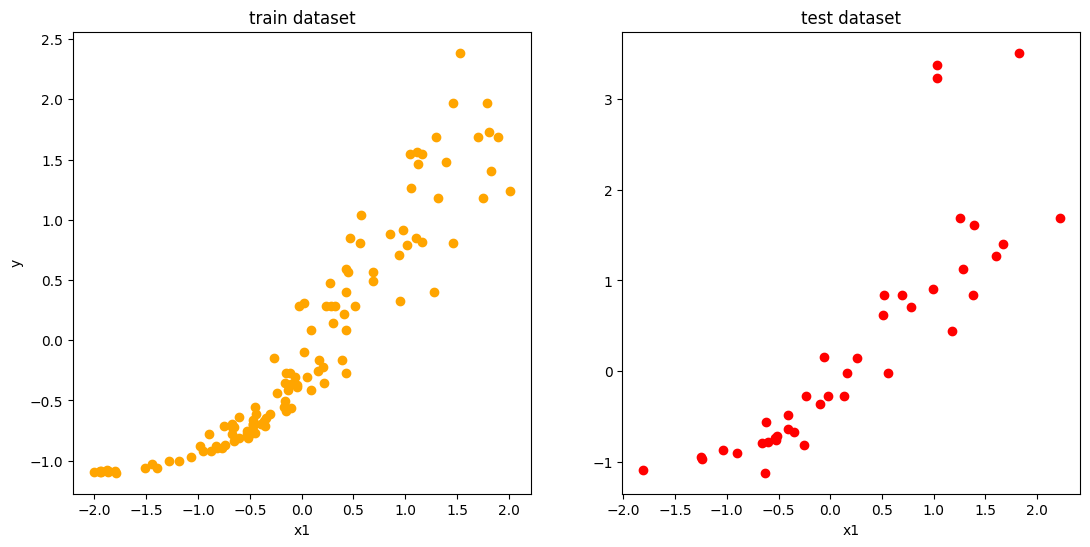

In [7]:
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,1:], y_train, color='orange')
plt.title('train dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,1:], y_test, color='red')
plt.title('test dataset')
plt.xlabel('x1')
plt.show()

### Implementation of Linear Regression

In [10]:
class Linear_Regression():

    def __init__(self, n_features, alpha=0.01):

        '''
        Constructor
        '''

        self.alpha = alpha
        self.theta = self.random_initializer(n_features)
        self.JHist = None

    def random_initializer(self, n_features):

      '''
      randomly initialize the weights and bias
      Arguments:
        n_features is the number of features
      Returns:
        numpy array
      '''

      return np.random.rand(n_features + 1, 1)

    def gradientDescent(self, X, y, validation, theta, verbose, n_iteration):

        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''

        n, d = X.shape
        self.JHist = []
        for i in range(n_iteration):
            if (validation is not None):
                self.JHist_test.append((self.compute_cost(validation[0], validation[1], theta), theta))
            self.JHist.append((self.compute_cost(X, y, theta), theta))
            if verbose and i % 10 == 0:
                print(f"* Iteration:{i}, Cost:{round(self.JHist[i][0], 5)}, Theta:{theta.ravel()}")

            # Calculate the gradient and update theta
            gradient = (1/n) * np.dot(X.T, (np.dot(X, theta) - y))
            theta -= self.alpha * gradient

        return theta

    def compute_cost(self, X, y, theta):

        '''
        Computes the objective function
        Arguments:
          X is a (n, d) numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
        '''
        n, d = X.shape
        error = np.dot(X, theta) - y
        cost = (1/(2 * n)) * np.dot(error.T, error)
        return cost[0, 0]

    def train(self, X, y, validation= None, verbose=True, n_iteration=100):

        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        self.JHist = []
        if (validation is not None):
            self.JHist_test = []
        self.theta = self.gradientDescent(X, y,
                                              validation = validation,
                                              theta = self.theta,
                                              verbose=verbose,
                                              n_iteration=n_iteration)

    def predict(self, X):

        '''
        calculate values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''

        return np.dot(X, self.theta)


### Train the model

In [11]:
# TODO : train a uni-variative regression
linear_regressor = Linear_Regression(n_features = 1)
linear_regressor.train(X_train, y_train, (X_test, y_test), n_iteration= 100)

* Iteration:0, Cost:0.39441, Theta:[0.44731387 0.19705397]
* Iteration:10, Cost:0.32995, Theta:[0.39772519 0.26041737]
* Iteration:20, Cost:0.27804, Theta:[0.35327913 0.31733267]
* Iteration:30, Cost:0.23622, Theta:[0.31344314 0.36845666]
* Iteration:40, Cost:0.20253, Theta:[0.27773976 0.41437919]
* Iteration:50, Cost:0.17539, Theta:[0.24574093 0.45562997]
* Iteration:60, Cost:0.15354, Theta:[0.21706286 0.49268471]
* Iteration:70, Cost:0.13593, Theta:[0.19136146 0.52597067]
* Iteration:80, Cost:0.12175, Theta:[0.16832826 0.55587153]
* Iteration:90, Cost:0.11032, Theta:[0.14768671 0.5827319 ]


### Visualization

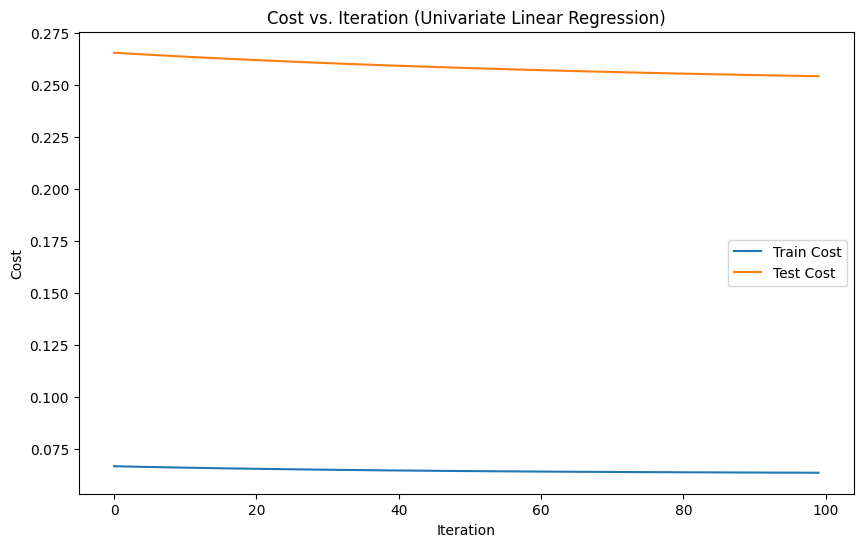

In [9]:
# TODO : plot the changes of costs over iterations for both train and test dataset ---> you can use linear_regressor.JHist
def plot_cost(JHist,JHist_test, title="Cost vs. Iteration"):
  """Plots the cost vs. iteration for a given JHist."""
  plt.figure(figsize=(10, 6))

  train_cost = [j[0] for j in JHist]
  test_cost = [j[0] for j in JHist_test]

  plt.plot(np.arange(len(JHist)), train_cost, label="Train Cost")
  plt.plot(np.arange(len(JHist)), test_cost, label="Test Cost")

  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title(title)
  plt.legend()
  plt.show()

# Plot the cost vs. iteration for both train and test dataset
plot_cost(linear_regressor.JHist, linear_regressor.JHist_test, title="Cost vs. Iteration (Univariate Linear Regression)")


In [10]:
linear_regressor = Linear_Regression(1)
fig, ax = plt.subplots()

def animate(i) :
    ax.cla()
    ax.set_title('fitting on training dataset')
    ax.set_xlabel('x1')
    ax.set_ylabel('y')
    ax.scatter(X_train[:,1:], y_train, alpha=0.7, color='orange', s=50, label='training points')
    ax.scatter(X_train[:,1:], linear_regressor.predict(X_train), color='black', alpha=0.7, s=20, label='predicted training points')
    ax.plot(X_train[:,1:], linear_regressor.predict(X_train), alpha=0.7, color='black', label='fitting line')
    ax.legend()
    linear_regressor.train(X_train, y_train, verbose=False, n_iteration=1)

ani = FuncAnimation(fig, animate, frames=300, interval=300)

plt.close()

In [11]:
HTML(ani.to_html5_video())

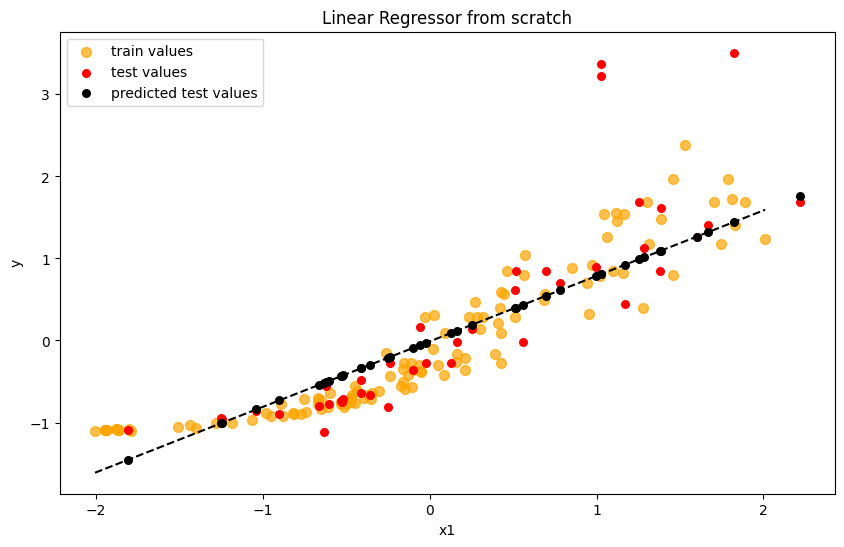

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 1:], y_train, label='train values', color='orange', alpha=0.7, s=50)
plt.scatter(X_test[:, 1:], y_test, label='test values', color='red', alpha=1, s=30)
plt.scatter(X_test[:, 1:], linear_regressor.predict(X_test), color='black', label='predicted test values', s=30)
plt.plot([X_train[:, 1:].min(),X_train[:, 1:].max()],
          [linear_regressor.predict([1, X_train[:, 1:].min()]), linear_regressor.predict([1, X_train[:, 1:].max()])],
          linestyle='--', color='black')
plt.legend()
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regressor from scratch')
plt.show()

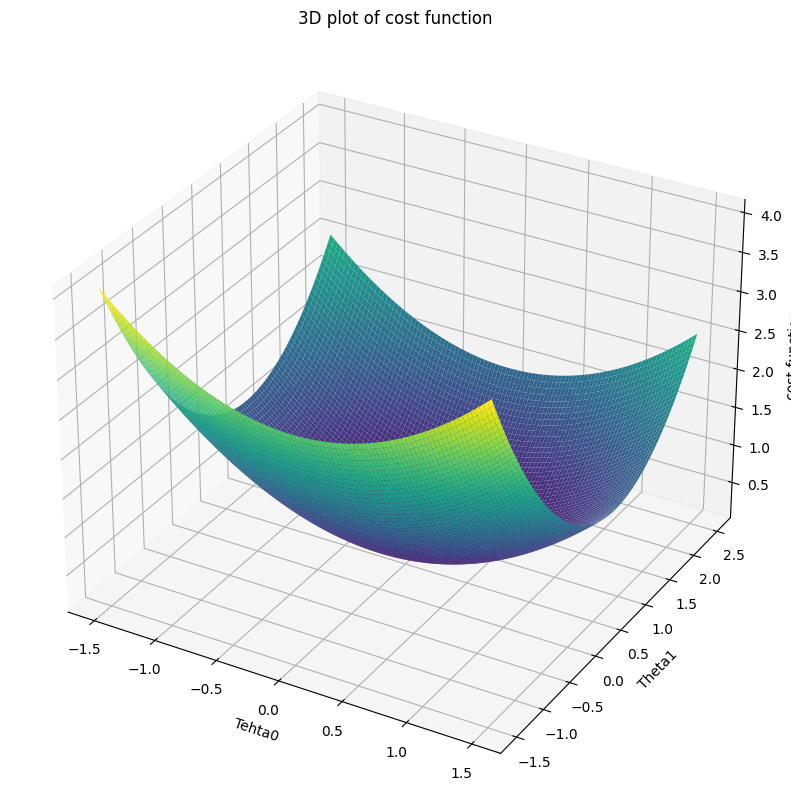

In [13]:
def cost(x, y, theta0, theta1):
    res = np.zeros_like(theta0)
    for i in range(len(x)):
        h = x[i] * theta1 + theta0
        res = res + (1/2 * (h - y[i])**2)
    res = res / len(x)
    return res


theta0_axis = np.linspace(-1.5, 1.5, 100)
theta1_axis = np.linspace(-1.5, 2.5, 100)
Theta0_axis, Theta1_axis = np.meshgrid(theta0_axis, theta1_axis)
cost_func = cost(X, y, Theta0_axis, Theta1_axis)
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(Theta0_axis, Theta1_axis, cost_func, rstride=1, cstride=1, cmap='viridis', edgecolor='none')#, cmap='binary')
ax.set_xlabel('Tehta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('cost function')
ax.set_title('3D plot of cost function')
plt.show()


### Univariative Regression Scikit-Learn

In [14]:
# TODO: use sklearn and implement Univariative Regression
sklearn_regressor = LinearRegression()

# Train the model on the training data
sklearn_regressor.fit(X_train[:, 1:], y_train)

# Make predictions on the test data
y_pred_sklearn = sklearn_regressor.predict(X_test[:, 1:])

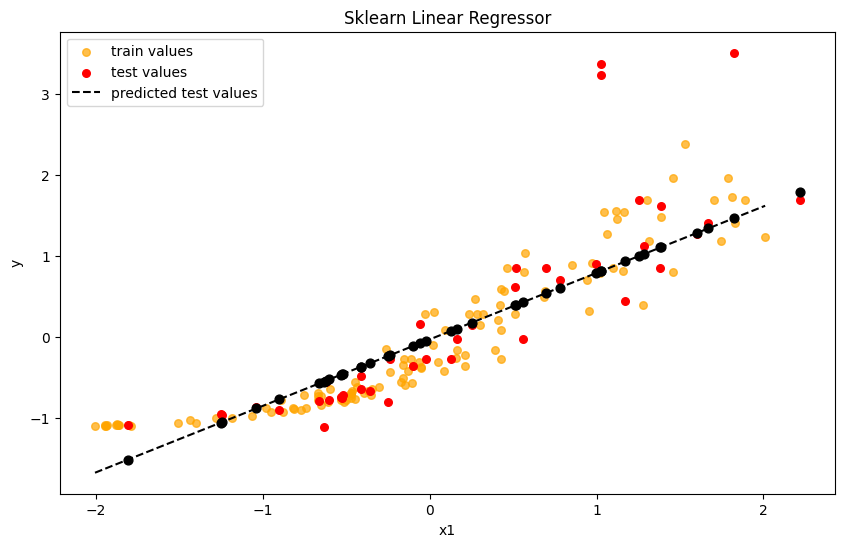

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 1:], y_train, label='train values', color='orange', alpha=0.7, s=30)
plt.scatter(X_test[:, 1:], y_test, label='test values', color='red', alpha=1, s=30)
plt.scatter(X_test[:, 1:], sklearn_regressor.predict(X_test[:,1:]), color='black', s=40)
plt.plot([X_train[:, 1:].min(), X_train[:, 1:].max()], [sklearn_regressor.predict(np.array(X_train[:, 1:].min()).reshape(1,1))[0][0],
                                                        sklearn_regressor.predict(np.array(X_train[:, 1:].max()).reshape(1,1))[0][0]],
                                                        color='black', linestyle='--', label='predicted test values')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Sklearn Linear Regressor')
plt.legend()
plt.show()

In [16]:
# TODO : Calculate MSE loss for your models


y_pred_custom = linear_regressor.predict(X_test)
cost_skratch_uni = mean_squared_error(y_test, y_pred_custom)

# Calculate the MSE for the scikit-learn LinearRegression model
cost_sklearn_uni = mean_squared_error(y_test, y_pred_sklearn)

print(f'Final MSE of the scratch version on test dataset : {cost_skratch_uni.round(5)}')
print('-------------------------------------------------------------------------------------------------')
print(f'Final MSE of the scikit-learn linear regression model on test dataset : {cost_sklearn_uni.round(5)}')


Final MSE of the scratch version on test dataset : 0.50511
-------------------------------------------------------------------------------------------------
Final MSE of the scikit-learn linear regression model on test dataset : 0.49727


## Part 2 : Multi-variative Regression

### Specify input & target

In [17]:
X = data[['x1', 'x2']].to_numpy()
y = data['y'].to_numpy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Add a bias column to X_train and X_test
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

### Train the multi-varitive Regression model

In [18]:
# TODO : Train the multi-varitive Regression
multi_linear_regressor = Linear_Regression(n_features = 2)
multi_linear_regressor.train(X_train, y_train, (X_test, y_test), n_iteration= 1000)

* Iteration:0, Cost:0.18632, Theta:[0.00782559 0.0416779  0.94560338]
* Iteration:10, Cost:0.17739, Theta:[0.00211468 0.04232815 0.91621274]
* Iteration:20, Cost:0.17001, Theta:[-0.00313182  0.04513548  0.88966451]
* Iteration:30, Cost:0.16376, Theta:[-0.0079366   0.04968236  0.8655133 ]
* Iteration:40, Cost:0.15833, Theta:[-0.01232406  0.05562446  0.84338978]
* Iteration:50, Cost:0.15352, Theta:[-0.01631951  0.06267792  0.82298749]
* Iteration:60, Cost:0.14918, Theta:[-0.01994848  0.07060891  0.80405198]
* Iteration:70, Cost:0.14521, Theta:[-0.02323626  0.07922486  0.78637187]
* Iteration:80, Cost:0.14154, Theta:[-0.02620756  0.08836733  0.76977138]
* Iteration:90, Cost:0.13811, Theta:[-0.02888619  0.0979061   0.7541042 ]
* Iteration:100, Cost:0.13488, Theta:[-0.03129496  0.10773423  0.73924841]
* Iteration:110, Cost:0.13183, Theta:[-0.03345549  0.11776401  0.72510231]
* Iteration:120, Cost:0.12894, Theta:[-0.03538819  0.12792365  0.71158093]
* Iteration:130, Cost:0.12618, Theta:[-0.0

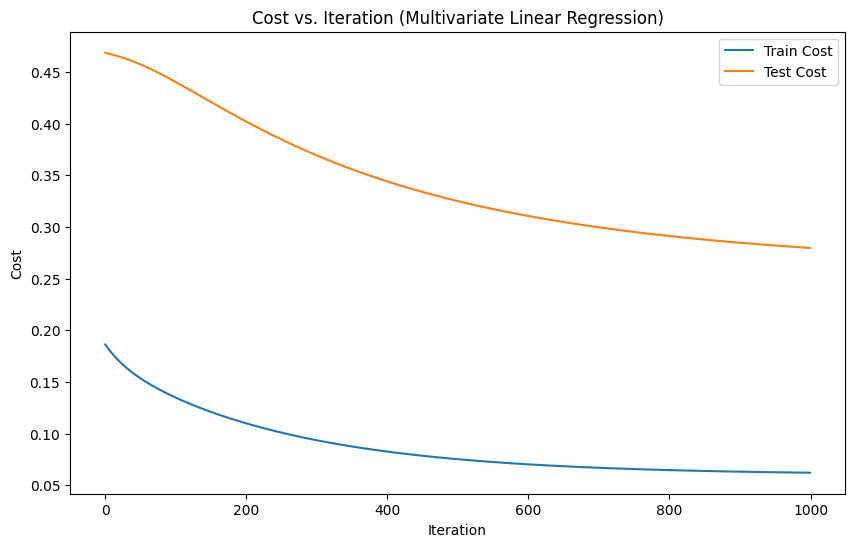

In [19]:
# TODO : plot the changes of costs over iterations for train and test dataset ---> you can use linear_regressor.JHist
plot_cost(multi_linear_regressor.JHist, multi_linear_regressor.JHist_test, title="Cost vs. Iteration (Multivariate Linear Regression)")


### Implement multi-variative regression using sklearn

In [20]:
# TODO : use sklearn and implement multi-variative regression
sklearn_multi_regressor = LinearRegression()

# Train the model on the training data
sklearn_multi_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_multi_sklearn = sklearn_multi_regressor.predict(X_test)

In [21]:
# TODO : Calculate MSE loss for your models

y_pred_multi_custom = multi_linear_regressor.predict(X_test)
cost_skratch_multi = mean_squared_error(y_test, y_pred_multi_custom)

# Calculate the MSE for the scikit-learn LinearRegression model
cost_sklearn_multi = mean_squared_error(y_test, y_pred_multi_sklearn)

print('Final MSE of the scratch version on test dataset :', cost_skratch_multi.round(5))
print('-------------------------------------------------------------------------------------------------')
print('Final MSE of the scikit-learn linear regression model on test dataset :', cost_sklearn_multi.round(5))


Final MSE of the scratch version on test dataset : 0.55936
-------------------------------------------------------------------------------------------------
Final MSE of the scikit-learn linear regression model on test dataset : 0.51931
